# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | \Taiwo | Oladeji | Taiwo | Hours | Contribution |
| Member 2: | Chukwuebuka | Ezeanaka | Chukwuebuka Ezeanaka, 15/10/2024 | 5 | 25 |
| Member 3: | Samson | Kpolugbo | Samson kpolugbo, 16/10/2024 | 5 | 25 |
| Member 4: | Folashade | Adewara | Folashade Adewara, 15/10/2024 | 5 | 25 |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

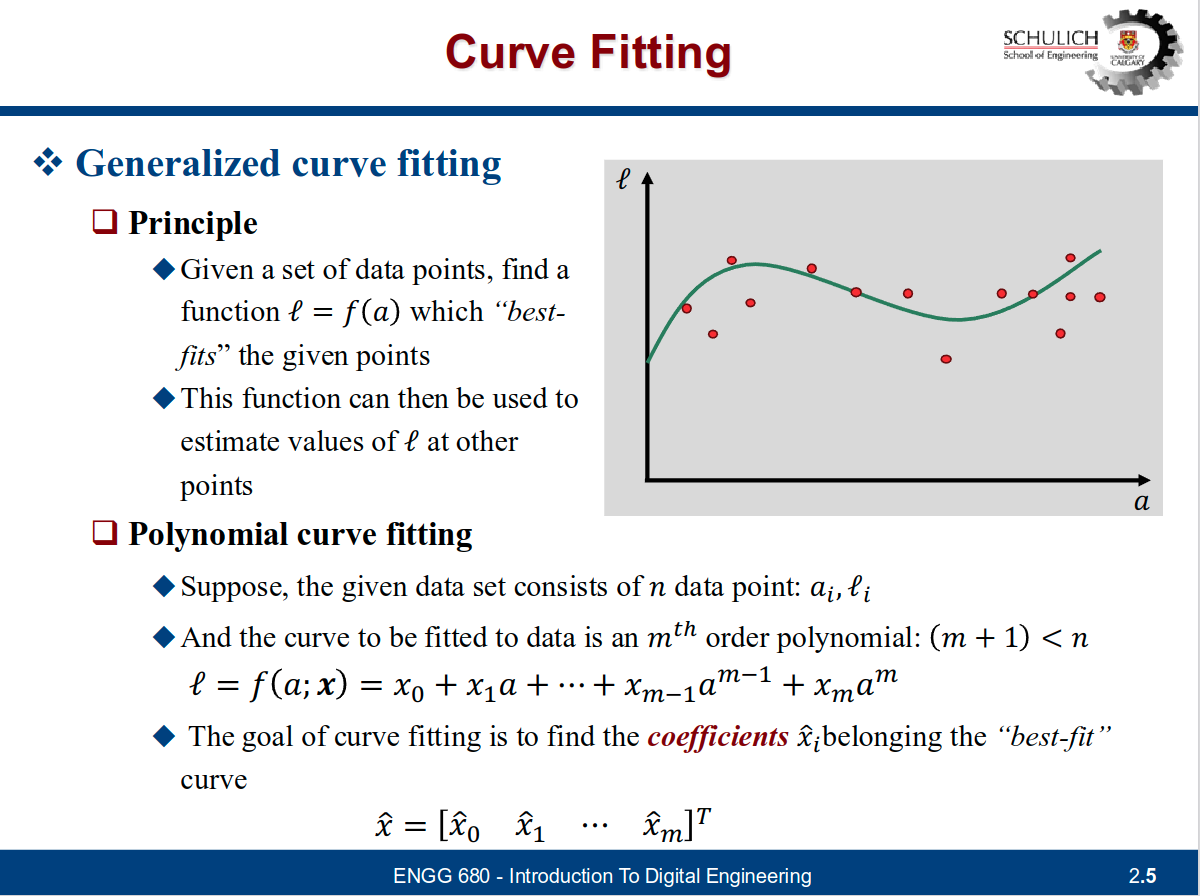

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/My Drive/engg680_2024_fall/Lab_Assignment2/data.xlsx') #using pandas to read excel file
df_data.head()
arr_data = df_data.to_numpy() #Converting the data here into numpy arrays


#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l =  arr_data[:, 0] #noisy observations
l_var = arr_data[:, 1] #variance of observations
l_true = arr_data[:, 2] #true observations

#printing just the first 15 values of the arrays
print("Noisy observations: ", l[:15])
print()
print("Variance of observations: ", l_var[:15])
print()
print("True observations: ", l_true[:15])

Noisy observations:  [-16.19488895 -15.93614373 -38.69059397 -15.76829142 -19.35466885
 -15.16497902 -15.49640085 -16.91724904 -17.52349248 -32.95407757
 -16.00065694 -25.04422086 -14.89213806 -15.7987726  -26.75754246]

Variance of observations:  [ 36. 144. 169. 169.   4.   4. 169.  25.  16. 121.   4.   9.  49.  64.
 144.]

True observations:  [-17.         -17.28959808 -17.57915025 -17.8686106  -18.15793323
 -18.44707228 -18.7359819  -19.02461629 -19.31292969 -19.60087638
 -19.88841072 -20.17548712 -20.46206005 -20.7480841  -21.0335139 ]


In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l) # we are using the number of the observations from the noisy observation

# print the value of n
print("Number of observations:", n)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# print the value of P
print("Observation weight matrix P:")
print(P)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


Number of observations: 500
Observation weight matrix P:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


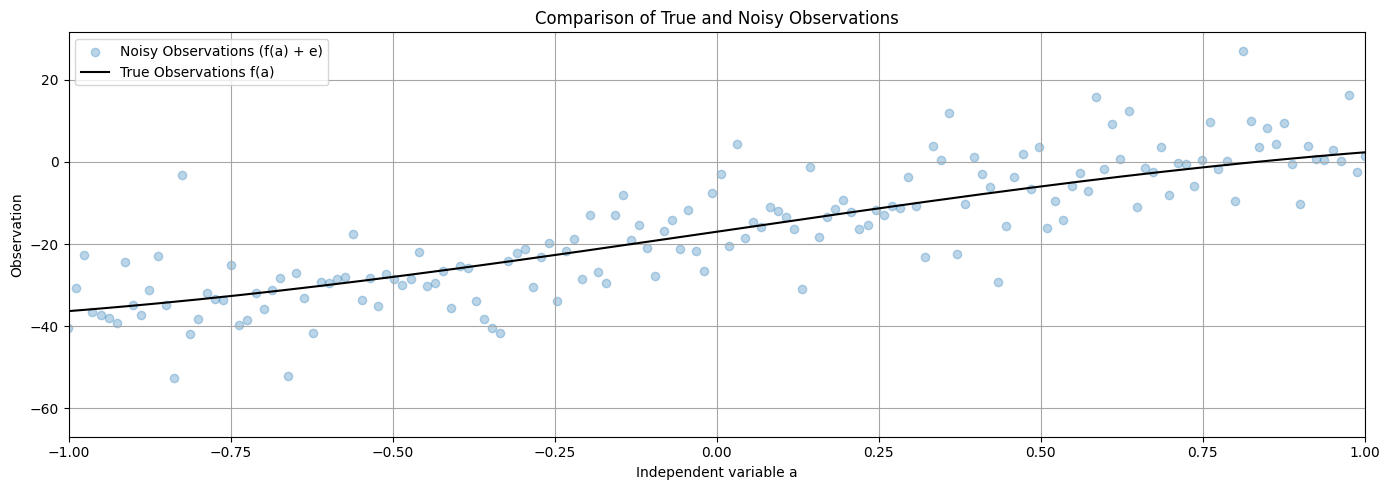

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

# We have already imported matplotlib in step1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

#The scatter plot for noisy observations
ax.scatter(a, l, label='Noisy Observations (f(a) + e)', color='tab:blue', marker='o', alpha=0.3)

#For true observations
ax.plot(a, l_true, label='True Observations f(a)', color='k') # True observation is plotted as continuous line due to "f(a)"

#Axis labels
ax.set_xlabel('Independent variable a')  # X-axis label
ax.set_ylabel('Observation')  # Y-axis label

#Legend of the plot
ax.legend()

#Title of plot
ax.set_title('Comparison of True and Noisy Observations')

#Scale range of x-axis
ax.set_xlim(-1, 1)


ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posteriori variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Number of noisy observations
    n = len(l)

    # Parameter (i.e. polynomial coefficients)
    m = deg + 1

    # Design matrix A
    A = np.vstack([a**d for d in range(m)]).T


    # Transpose of the design matrix A
    A_Trans = A.T

    # Normal Matrix N and the right hand side vector b
    N = A_Trans @ P @ A
    b = A_Trans @ P @ l

    # Matrix inverse to solve for the polynomial coefficients
    A_matrix_inv = np.linalg.inv(N)

    # Estimated coefficients, x
    x = A_matrix_inv @ b

    # Estimated observations, l_hat
    l_hat = A @ x

    # Calculation for the residuals, v
    v = l - l_hat

    # Calculation of the sum of squared residuals
    sum_squared_v = np.sum(v**2)

    # Calculation of the aposteriori variance factor
    apv = (1 / (n - deg - 1)) * sum_squared_v  # Note: n - deg - 1 for degrees of freedom

    # Covariance matrix of the estimated coefficients
    cov_x = apv * A_matrix_inv

    return (x, cov_x, apv, v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

# Degrees of the polynomial to fit
degrees = [1, 3, 5]

# Store results for each polynomial degree
results = {}

#function for the degree
for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
    results[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'a_posteriori_variance': apv,
        'residuals': v
    }

# Display results
for deg, res in results.items():
    print(f"Polynomial Degree: {deg}")
    print()
    print(f"Estimated Coefficients: {res['coefficients']}")
    print()
    print(f"Covariance of Coefficients: {res['covariance']}")
    print()
    print(f"A Posteriori Variance: {res['a_posteriori_variance']}")
    print()
    print(f"Residuals: {res['residuals']}")
    print("-" * 40)  #Just a separator for better readability


Polynomial Degree: 1

Estimated Coefficients: [-16.59352348   7.25633807]

Covariance of Coefficients: [[3.25485217e-01 3.36083382e-17]
 [3.36083382e-17 9.85406897e-02]]

A Posteriori Variance: 162.74260860432202

Residuals: [ 2.31950929e+01  2.33624696e+01  5.16650752e-01  2.33475847e+01
  1.96698387e+01  2.37681600e+01  2.33453696e+01  2.18331528e+01
  2.11355408e+01  5.61358715e+00  2.24756392e+01  1.33407067e+01
  2.34014210e+01  2.24034178e+01  1.13532794e+01  2.53650032e+01
  1.44202357e+01  8.52085442e+00  1.79247562e+01  2.11851700e+00
  1.46072683e+01  9.70673172e+00  1.30817824e+01  1.63166651e+01
  1.15688083e+01  1.16383392e+01  6.07754648e+00  3.24693889e+01
  1.42879391e+01  1.41679638e+01  1.73166729e+01  7.83535648e+00
  1.73215977e+01  1.35522578e+01 -5.87401633e+00 -2.04342770e+00
  8.45600371e+00 -7.17469845e+00  7.13670400e+00  4.93927812e+00
  7.53688443e+00  1.29373203e+01  6.55314295e+00  5.69877998e+00
  1.01514943e+01  4.53954123e+00  1.48752086e+01  9.72183415

In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)


line_uw = np.polyval(results[1]['coefficients'][::-1], a)  # For degree 1 (linear)
cubic_uw = np.polyval(results[3]['coefficients'][::-1], a)  # For degree 3 (cubic)
quintic_uw = np.polyval(results[5]['coefficients'][::-1], a)  # For degree 5 (quintic)

# Show the constructed polynomial functions
print("Line (Degree 1):", line_uw)
print()
print("-" * 40) #Just for clarity
print("Cubic (Degree 3):", cubic_uw)
print()
print("-" * 40) #Just for Clarity
print("Quintic (Degree 5):", quintic_uw)
print("-" * 40) #Just for clarity

Line (Degree 1): [-3.93899819e+01 -3.92986133e+01 -3.92072447e+01 -3.91158761e+01
 -3.90245076e+01 -3.89331390e+01 -3.88417704e+01 -3.87504019e+01
 -3.86590333e+01 -3.85676647e+01 -3.84762962e+01 -3.83849276e+01
 -3.82935590e+01 -3.82021904e+01 -3.81108219e+01 -3.80194533e+01
 -3.79280847e+01 -3.78367162e+01 -3.77453476e+01 -3.76539790e+01
 -3.75626104e+01 -3.74712419e+01 -3.73798733e+01 -3.72885047e+01
 -3.71971362e+01 -3.71057676e+01 -3.70143990e+01 -3.69230305e+01
 -3.68316619e+01 -3.67402933e+01 -3.66489247e+01 -3.65575562e+01
 -3.64661876e+01 -3.63748190e+01 -3.62834505e+01 -3.61920819e+01
 -3.61007133e+01 -3.60093447e+01 -3.59179762e+01 -3.58266076e+01
 -3.57352390e+01 -3.56438705e+01 -3.55525019e+01 -3.54611333e+01
 -3.53697648e+01 -3.52783962e+01 -3.51870276e+01 -3.50956590e+01
 -3.50042905e+01 -3.49129219e+01 -3.48215533e+01 -3.47301848e+01
 -3.46388162e+01 -3.45474476e+01 -3.44560790e+01 -3.43647105e+01
 -3.42733419e+01 -3.41819733e+01 -3.40906048e+01 -3.39992362e+01
 -3.3907

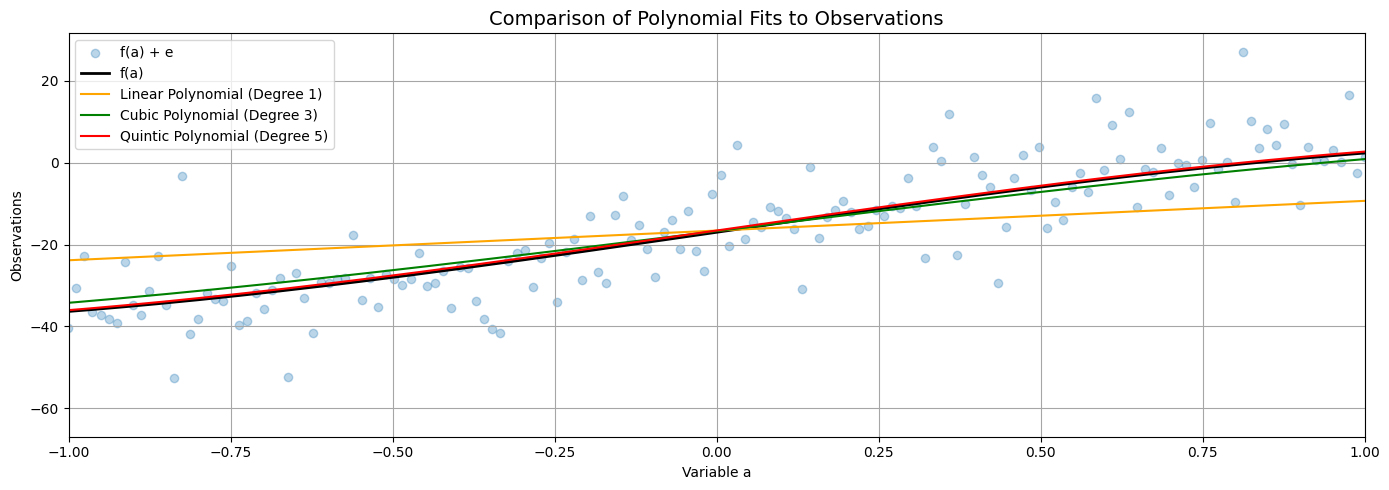

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the noisy observations (l) as a scatter plot
ax.scatter(a, l, color='tab:blue', label='f(a) + e', marker='o', alpha=0.3)

# Plot the true observations (l_true) as a line with color 'k'
ax.plot(a, l_true, color='k', label='f(a)', linewidth=2)

# Plot the polynomial functions
ax.plot(a, line_uw, color='orange', label='Linear Polynomial (Degree 1)')
ax.plot(a, cubic_uw, color='green', label='Cubic Polynomial (Degree 3)')
ax.plot(a, quintic_uw, color='red', label='Quintic Polynomial (Degree 5)')

# Set the x-axis range
ax.set_xlim(-1, 1)

# Add legend
ax.legend()

# Add titles and labels
ax.set_title('Comparison of Polynomial Fits to Observations', fontsize=14)
ax.set_xlabel('Variable a')
ax.set_ylabel('Observations')


ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

plt.show()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

# Number of observations
n = len(l)

# Degree 1 (Linear)
residuals_degree1 = l - line_uw
rss_degree1 = np.sum(residuals_degree1**2)
a_posteriori_variance_degree1 = rss_degree1 / (n - 2)  # degrees of freedom = n - parameters

# Degree 3 (Cubic)
residuals_degree3 = l - cubic_uw
rss_degree3 = np.sum(residuals_degree3**2)
a_posteriori_variance_degree3 = rss_degree3 / (n - 4)  # degrees of freedom = n - parameters

# Degree 5 (Quintic)
residuals_degree5 = l - quintic_uw
rss_degree5 = np.sum(residuals_degree5**2)
a_posteriori_variance_degree5 = rss_degree5 / (n - 6)  # degrees of freedom = n - parameters

#The Aposteriori Variance for each polynomial degree
print(f"A Posteriori Variance for Degree 1: {a_posteriori_variance_degree1:.4f}\n")
print(f"A Posteriori Variance for Degree 3: {a_posteriori_variance_degree3:.4f}\n")
print(f"A Posteriori Variance for Degree 5: {a_posteriori_variance_degree5:.4f}\n")


A Posteriori Variance for Degree 1: 162.7426

A Posteriori Variance for Degree 3: 66.1323

A Posteriori Variance for Degree 5: 63.7583



In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

# The norm for each polynomial degree
norm_degree1 = np.linalg.norm(l_true - line_uw)
norm_degree3 = np.linalg.norm(l_true - cubic_uw)
norm_degree5 = np.linalg.norm(l_true - quintic_uw)

# Print the norms with spacing
print(f"Norm between True Observations and Degree 1 Predictions: {norm_degree1:.4f}\n")
print(f"Norm between True Observations and Degree 3 Predictions: {norm_degree3:.4f}\n")
print(f"Norm between True Observations and Degree 5 Predictions: {norm_degree5:.4f}\n")

Norm between True Observations and Degree 1 Predictions: 229.0602

Norm between True Observations and Degree 3 Predictions: 38.2860

Norm between True Observations and Degree 5 Predictions: 17.3700



In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

#.......................Result conclusion................
#The a posteriori variance and the norm indicate a clear trend which is; as the polynomial degree increases from 1 to 5,
#the fit improves, with both the variance and norm decreasing. This demonstrates that higher-degree polynomials can capture more complexity in the data.

#........................Pattern Summary.......................
# It is evident that the a posteriori variance factor and the norm show that increasing polynomial degree improves the model's fit.


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

# Variance of observations
P = np.diag(l_var) #this creates an diagonal matrix

#Print the P matrix
print("Observation weight matrix P:")
print(P)




Observation weight matrix P:
[[ 36.   0.   0. ...   0.   0.   0.]
 [  0. 144.   0. ...   0.   0.   0.]
 [  0.   0. 169. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  25.   0.   0.]
 [  0.   0.   0. ...   0.  64.   0.]
 [  0.   0.   0. ...   0.   0.   4.]]


In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

#Calcuting from step 6 to step 10
# Defining the design matrices for each polynomial degree
X_degree1 = np.vstack([np.ones_like(a), a]).T  # Degree 1 (Linear)
X_degree3 = np.vstack([np.ones_like(a), a, a**2, a**3]).T  # Degree 3 (Cubic)
X_degree5 = np.vstack([np.ones_like(a), a, a**2, a**3, a**4, a**5]).T  # Degree 5 (Quintic)

#for Polynomial of Degree 1
coeffs_degree1 = np.linalg.inv(X_degree1.T @ np.linalg.inv(P) @ X_degree1) @ (X_degree1.T @ np.linalg.inv(P) @ l)
line_uw_degree1 = X_degree1 @ coeffs_degree1

#Degree 3
coeffs_degree3 = np.linalg.inv(X_degree3.T @ np.linalg.inv(P) @ X_degree3) @ (X_degree3.T @ np.linalg.inv(P) @ l)
cubic_uw = X_degree3 @ coeffs_degree3

#Degree 5
coeffs_degree5 = np.linalg.inv(X_degree5.T @ np.linalg.inv(P) @ X_degree5) @ (X_degree5.T @ np.linalg.inv(P) @ l)
quintic_uw = X_degree5 @ coeffs_degree5

#Calculating residuals for each polynomial degree
residuals_degree1 = l - line_uw_degree1
residuals_degree3 = l - cubic_uw
residuals_degree5 = l - quintic_uw

#Calculating the A Posteriori Variance for each polynomial
a_posteriori_variance_degree1 = (residuals_degree1.T @ np.linalg.inv(P) @ residuals_degree1) / (len(l) - len(coeffs_degree1))
a_posteriori_variance_degree3 = (residuals_degree3.T @ np.linalg.inv(P) @ residuals_degree3) / (len(l) - len(coeffs_degree3))
a_posteriori_variance_degree5 = (residuals_degree5.T @ np.linalg.inv(P) @ residuals_degree5) / (len(l) - len(coeffs_degree5))

#A Posteriori Variance for each degree
print(f"A Posteriori Variance for Degree 1: {a_posteriori_variance_degree1:.4f}\n")
print(f"A Posteriori Variance for Degree 3: {a_posteriori_variance_degree3:.4f}\n")
print(f"A Posteriori Variance for Degree 5: {a_posteriori_variance_degree5:.4f}\n")

#Calculating the norm between predicted observations and true observations
norm_degree1 = np.linalg.norm(l_true - line_uw_degree1)
norm_degree3 = np.linalg.norm(l_true - cubic_uw)
norm_degree5 = np.linalg.norm(l_true - quintic_uw)

print(f"Norm between True Observations and Degree 1 Predictions: {norm_degree1:.4f}\n")
print(f"Norm between True Observations and Degree 3 Predictions: {norm_degree3:.4f}\n")
print(f"Norm between True Observations and Degree 5 Predictions: {norm_degree5:.4f}\n")


A Posteriori Variance for Degree 1: 12.0547

A Posteriori Variance for Degree 3: 1.1445

A Posteriori Variance for Degree 5: 0.9447

Norm between True Observations and Degree 1 Predictions: 230.6776

Norm between True Observations and Degree 3 Predictions: 36.0703

Norm between True Observations and Degree 5 Predictions: 5.7416



In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# .................. A Posterier............
#Unweighted LSE produces higher a posteriori variance factors while the weighted produces lower a posteriori variance for each degree.

#................... Norm ..................
#Weighted LSE results in a smaller norm by applying weights, the model fits the more reliable observations better, reducing the distance between the true values.
#Unweighted LSE typically results in a larger norm.

#.................. Phenomena ..............
#In unweighted LSE, all observations contribute equally, regardless of their variance or reliability.
#This can lead to overfitting to noisy data points or outliers, resulting in higher variance factors and larger norms.
#In weighted LSE we treated the variances as weights directly, this reduced the impact of noisy data points, leading to a more accurate fit, as reflected in lower posterior variance factors and norms.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

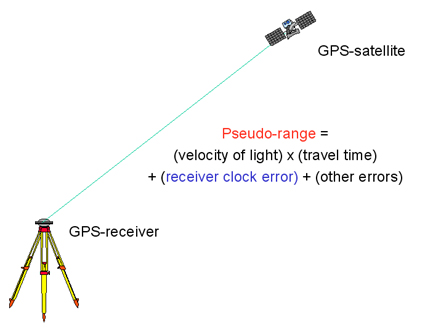

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/My Drive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')  #for the range measurements
pseudorange = df_pseudorange.to_numpy()

df_sat_pos = pd.read_excel('/content/drive/My Drive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx').drop("Satellite_ID", axis=1) #for the positions
sat_pos = df_sat_pos.to_numpy()

#Show the results
print(df_pseudorange)
print(df_sat_pos)
print("Pseudorange measurements:", pseudorange[:5])  # Display the first 5 measurements
print("Satellite positions:", sat_pos[:5])

    Satellite_ID             P
0              7  2.291974e+07
1              8  2.045989e+07
2             11  2.240034e+07
3             15  2.282914e+07
4             17  2.234201e+07
5             18  2.564645e+07
6             19  2.381478e+07
7             24  2.431140e+07
8             26  2.135364e+07
9             27  2.497161e+07
10            28  2.063898e+07
               x             y             z
0   5.280792e+06 -2.550146e+07  4.649508e+06
1  -2.159656e+06 -2.111602e+07  1.559791e+07
2   1.037185e+07 -2.171311e+07  1.055869e+07
3  -1.608576e+07  4.285071e+06  2.074204e+07
4  -1.431299e+07 -2.204501e+07  4.671208e+06
5  -2.435718e+06  1.625721e+07  2.109978e+07
6   1.591247e+07 -3.462515e+06  2.105363e+07
7   1.627185e+07 -2.187663e+05  2.103533e+07
8  -1.924704e+07 -7.259804e+06  1.647298e+07
9  -1.593115e+07  1.207737e+07  1.805808e+07
10 -7.680014e+06 -1.385546e+07  2.184298e+07
Pseudorange measurements: [[7.00000000e+00 2.29197410e+07]
 [8.00000000e+00 2.04598941e+

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)

# Define number of measurements (rows of pseudorange array)
n = pseudorange.shape[0]

# Define number of states (typically 4 in a GPS system: X, Y, Z, and clock bias)
m = 4

print(f"Number of measurements (n): {n}")
print(f"Number of states (m): {m}")

Number of measurements (n): 11
Number of states (m): 4


In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

# Defining the weight matrix P as an identity matrix of size n
P = np.eye(n)  # Identity matrix of size n, where n is the number of measurements
print("Weight matrix P:")
print(P)

Weight matrix P:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
# Setting the initial states as a zero vector of size m
x_0 = np.zeros(m)  # m is the number of states
print("Initial state vector x_0:")
print(x_0)

Initial state vector x_0:
[0. 0. 0. 0.]


In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])
print("GroundTruth coordinates of the receiver:")
print(GroundTruth)

GroundTruth coordinates of the receiver:
[-1633489.37967725 -3651627.18250363  4952481.61954918]


In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)  # m is the number of states

# Initialize the iteration loop counter
i = 0

 #Initialize related arrays as empty lists
arr_w = []    #This is to store weights or adjustments
arr_delta=[]  #This is to store corrections made in each iteration
arr_err_pos = []  #This is to store error positions or residuals
arr_i = []        #This is to store iteration counts
x_hat = x_0.copy()  #Then copy the initial state to x_hat

print("Corrections array (delta):", delta)
print("Iteration counter (i):", i)
print("x_hat (initial state vector copy):", x_hat)


Corrections array (delta): [1. 1. 1. 1.]
Iteration counter (i): 0
x_hat (initial state vector copy): [0. 0. 0. 0.]


In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):

# Compute the difference between the receiver position and each satellite position
# diff = satellite_pos[:, 1:4] - receiver_pos  # This will be an n x 3 array
    diff = satellite_pos - receiver_pos  # This will be an n x 3 array


# Calculate the Euclidean distance (L2 norm) for each satellite
    distance = np.linalg.norm(diff, axis=1)  # Compute row-wise Euclidean distance

# distances = np.linalg.norm(satellite_pos - receiver_pos, axis=1)

    return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
# def design_matrix(r_pos, s_pos, rho):



def create_design_matrix(r_pos, s_pos, rho):

# Number of satellites
    n = s_pos.shape[0]

    # Initialize the design matrix A with zeros
    A = np.zeros((n, 4))
    print(f"Design matrix before:\n {A}")

    # Loop through each satellite to fill in the design matrix A
    for i in range(n):
        # Compute the difference between the satellite position and the receiver position
        # diff = r_pos[:3] - s_pos[i, :3]    # Take only the first three elements (X, Y, Z)
        diff = r_pos - s_pos[i, :3]    # Take only the first three elements (X, Y, Z)


        # Compute the range rate (partial derivatives)
        # The derivative with respect to each state is normalized by the geometric distance
        # A[i, 0:3] = diff / rho[i]  # Normalizing by distance to get the gradient
        x,y,z  = diff / rho[i]
        # A[i] = diff / rho[i]
        # A[i, 3] = -1  ## step 8
        # A[i, 3] = -1  ## step 8
        A[i] = [x,y,z, -1]
        print(f"Current A: {A}")


    return A



In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

threshold = 0.001

while np.linalg.norm(delta[:3]) >= threshold:  # Only check for x, y, z corrections

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos)
       print(f"Rho:\n {rho}")


       # compute the design matrix A
       # (1 marks)
       A = create_design_matrix(x_hat[:3], sat_pos, rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange[:, 1] - (rho)
       print(f"Misclosure, w : {w}")


       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # Residuals
       residuals = w - (A @ delta)

       # update the states
       # (1 marks)
       x_hat = x_0 + delta

       # Update initial values
       x_0 = x_hat


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(GroundTruth - x_hat[:3])


       # update the counter i, (i.e., increment of 1 for each iteration)
       # (1 marks)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)

# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
arr_err_pos = np.array(arr_err_pos)
arr_err_pos = np.reshape(arr_err_pos,(len(arr_err_pos),1))

apv = (w.T @ P @ w) / (n - m)


# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.inv(A.T @ P @ A)


residuals = np.array(residuals)
print(f"residuals: {residuals}") #To output the residuals value


Rho:
 [26454284.28283253 26340945.09697588 26277754.71787928 26595974.25813834
 26695776.25180958 26747525.83435867 26616740.72663527 26595227.45399327
 26353600.49429986 26939906.11311798 26982810.03000365]
Design matrix before:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Current A: [[-0.19961953  0.96398224 -0.17575634 -1.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Current A: [[-0.19961953  0.96

In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

print("\nResults after LSE Convergence:")
print("=" * 50)
print(f"Estimated States (x, y, z, clock bias): {x_hat}")
print(f"Corrections Array (delta): {delta}")
print(f"Estimated Measurements Residuals (w): {w}")
print(f"A Posteriori Variance of Unit Weight: {apv}")
print(f"Covariance Matrix of Estimated States:\n{C_x_hat}")
print(f"Number of Iterations: {i}")
print(f"3-D Position Errors: {err_pos}")
print("=" * 50)


Results after LSE Convergence:
Estimated States (x, y, z, clock bias): [-1633492.44451686 -3651629.54237943  4952485.43270835 -1266156.46031267]
Corrections Array (delta): [ 3.22969020e-06  6.39415364e-06 -1.75956594e-05 -6.47201389e+00]
Estimated Measurements Residuals (w): [6.73199449 6.58320138 5.37251963 6.46702534 6.67233761 5.05386584
 6.38075615 7.98411365 6.735682   7.08340713 6.12735872]
A Posteriori Variance of Unit Weight: 66.70786239405479
Covariance Matrix of Estimated States:
[[ 21.32317253   4.6470333   -5.64161838   4.87426443]
 [  4.6470333   28.38210978 -38.76203647  24.56574422]
 [ -5.64161838 -38.76203647 136.45770908 -73.64685924]
 [  4.87426443  24.56574422 -73.64685924  46.64596428]]
Number of Iterations: 5
3-D Position Errors: 5.431614720639106


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
# After convergence, the estimated states for the receiver position and clock
# bias indicate significant deviations, particularly with values around
# -1,633,492.44 for x, -3,651,629.54 for y, and 4,952,485.43 for z, alongside a
# clock bias of -1,266,156.46. The corrections array shows small adjustments in
# position but a large change in clock bias of approximately -6.47. The
# estimated measurements residuals are relatively low, suggesting a good fit,
# but the A Posteriori Variance of Unit Weight is 66.71, indicating some level
# of noise or uncertainty in the measurements. The Covariance Matrix reveals
# considerable uncertainty, especially in the z-coordinate and clock bias. The
# process took 5 iterations, resulting in a 3-D Position Error of approximately
# 5.43 meters, which is within an acceptable range but still warrants further
# investigation. %% step 12 Using the imported matplotlib, plot the following (3
# marks in total). Make sure to include proper axes information, legend, grid
# lines and title.

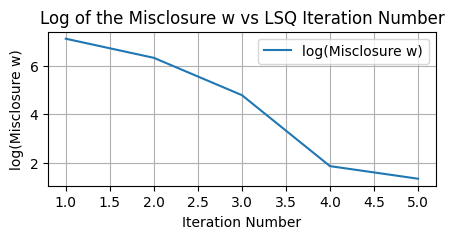

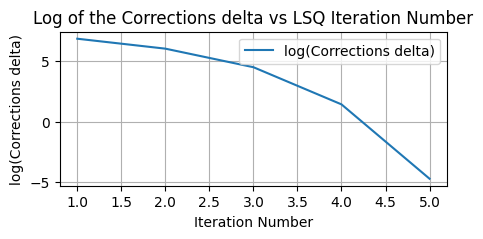

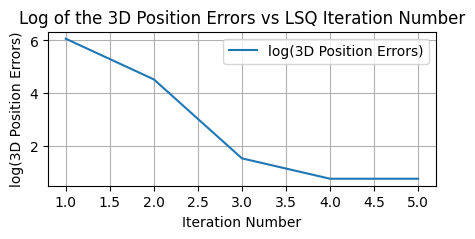

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 2))
plt.plot(arr_i, np.log10([np.linalg.norm(w) for w in arr_w]), label='log(Misclosure w)')
plt.xlabel('Iteration Number')
plt.ylabel('log(Misclosure w)')
plt.title('Log of the Misclosure w vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(5, 2))
plt.plot(arr_i, np.log10([np.linalg.norm(delta[:3]) for delta in arr_delta]), label='log(Corrections delta)')
plt.xlabel('Iteration Number')
plt.ylabel('log(Corrections delta)')
plt.title('Log of the Corrections delta vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(5, 2))
plt.plot(arr_i, np.log10(arr_err_pos), label='log(3D Position Errors)')
plt.xlabel('Iteration Number')
plt.ylabel('log(3D Position Errors)')
plt.title('Log of the 3D Position Errors vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
#Plot of the misclosure w against the LSQ iteration number i
#The misclosure decreases steadily, approaching zero by the 5th iteration, indicating the model is converging and the residuals are nearly eliminated.

#Plot of the corrections delta against the LSQ iteration number i
#The corrections shrink with each iteration, stabilizing near zero by the 5th iteration, showing that the parameter estimates are converging.

#Plot of the 3D position errors against the LSQ iteration number i
#Position errors drop rapidly, stabilizing by the 4th iteration, indicating accurate 3D position estimates.

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
